In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#from google.colab.data_table import DataTable
import geopandas as gpd
from matplotlib.lines import Line2D
pd.set_option('display.max_columns', 100)
#DataTable.max_columns = 1000
from sklearn.preprocessing import KBinsDiscretizer
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split

In [107]:
df = pd.read_csv('../Datasets/CleanedDS.csv')

In [108]:
df.head()

,CountryCode,Date,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex,Population,GDP_Per_Capita,Life_Expectancy,Hospital_Beds_Per_Thousand,Mortality Rate,H5,V1,V3,Mortality_Rate_7day_MA,ConfirmedCases_7day_MA
0,AFG,2020-01-01,0.0,0.0,NV,0.0,0.0,0.0,0.0,41128772.0,1803.987,64.83,0.50,0.0,0.0,0,0,0.0,0.0
1,BRA,2020-01-01,0.0,0.0,NV,0.0,0.0,0.0,0.0,215313504.0,14103.452,75.88,2.20,0.0,0.0,0,0,0.0,0.0
2,NLD,2020-01-01,0.0,0.0,NV,0.0,0.0,0.0,0.0,17564020.0,48472.545,82.28,3.32,0.0,0.0,0,0,0.0,0.0
3,ZAF,2020-01-01,0.0,0.0,NV,0.0,0.0,0.0,0.0,59893884.0,12294.876,64.13,2.32,0.0,0.0,0,0,0.0,0.0
4,NOR,2020-01-01,0.0,0.0,NV,0.0,0.0,0.0,0.0,5434324.0,64800.057,82.40,3.60,0.0,0.0,0,0,0.0,0.0


### Country-Specific Plots

In [109]:
countries = ['USA', 'IND', 'CHN', 'GER', 'FRA', 'SWE']
justViewing = df[df['CountryCode'].isin(countries)]
justViewing.shape

(5480, 19)

In [110]:
df.columns

Index(['CountryCode', 'Date', 'ConfirmedCases', 'ConfirmedDeaths',
       'MajorityVaccinated', 'StringencyIndex_Average',
       'GovernmentResponseIndex_Average', 'ContainmentHealthIndex_Average',
       'EconomicSupportIndex', 'Population', 'GDP_Per_Capita',
       'Life_Expectancy', 'Hospital_Beds_Per_Thousand', 'Mortality Rate', 'H5',
       'V1', 'V3', 'Mortality_Rate_7day_MA', 'ConfirmedCases_7day_MA'],
      dtype='object')

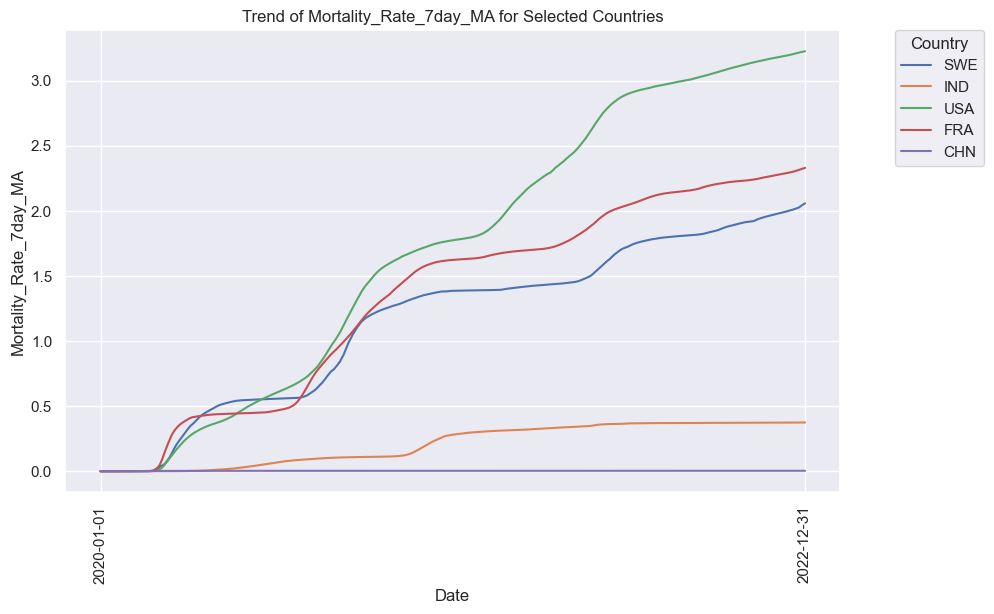

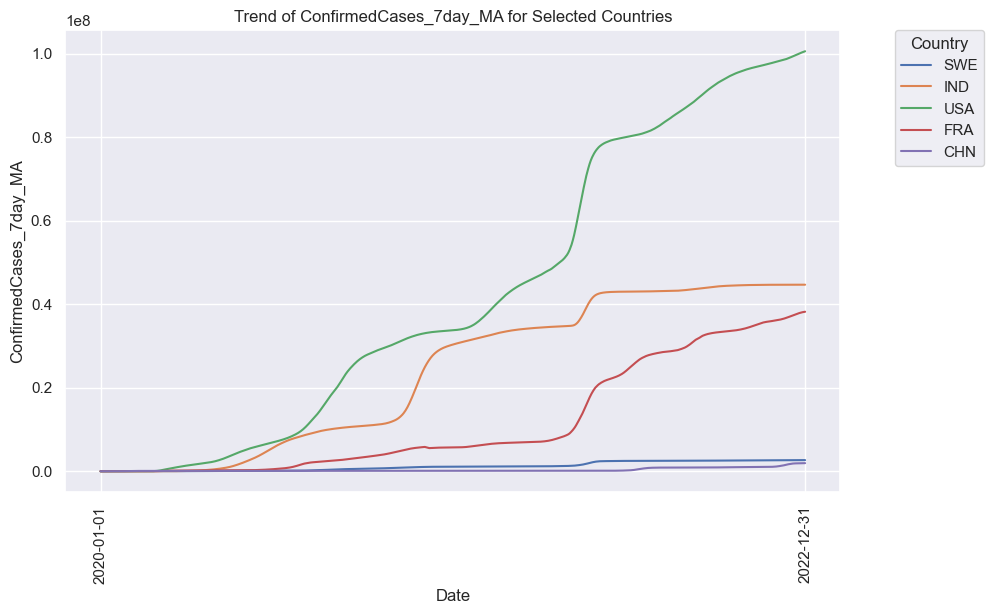

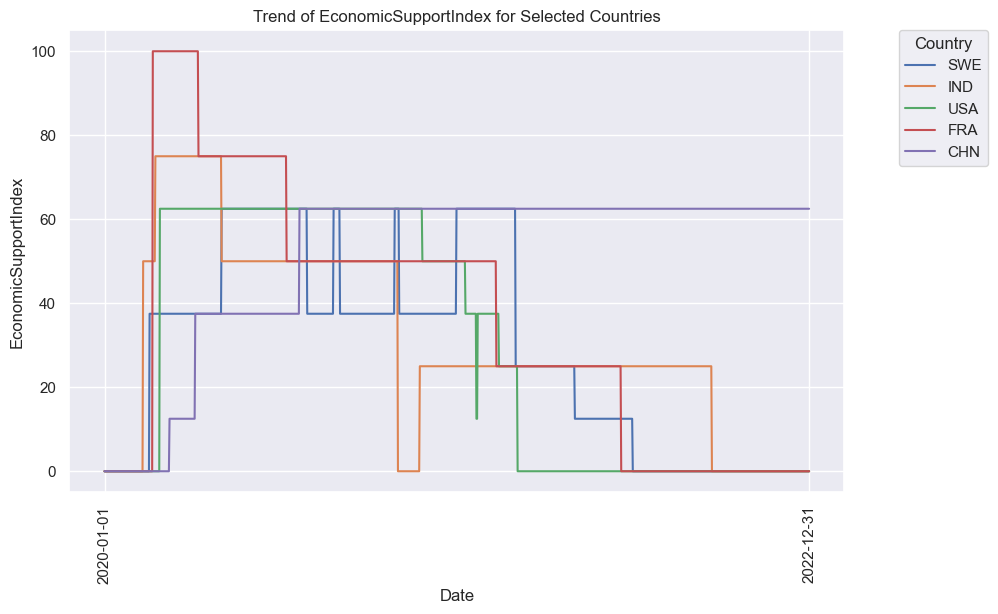

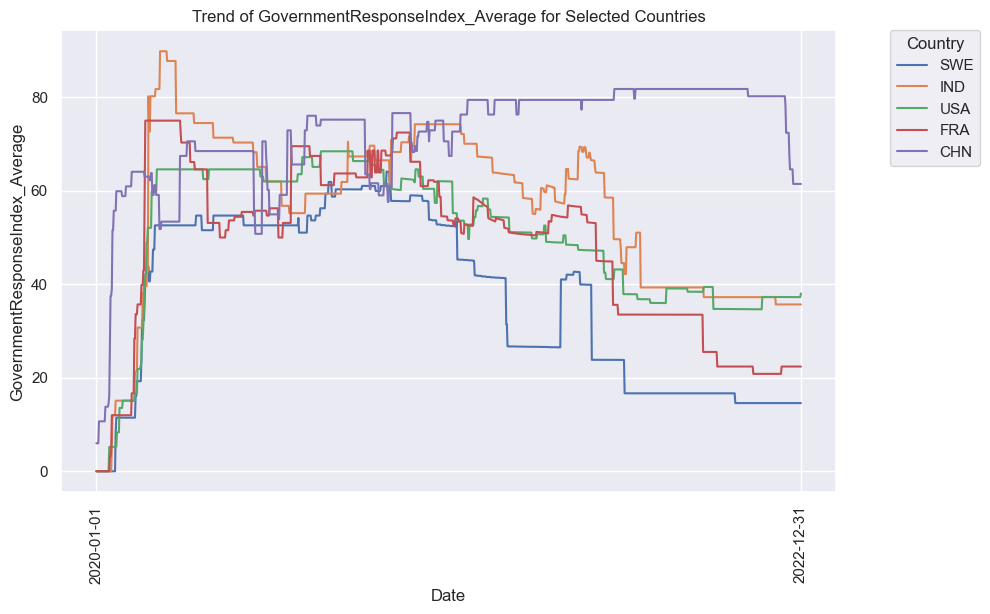

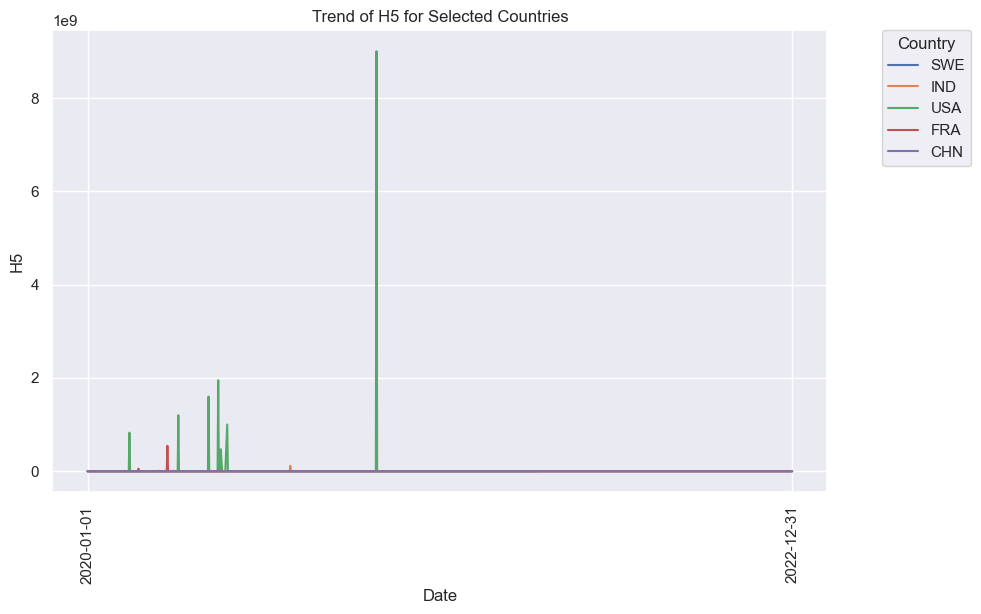

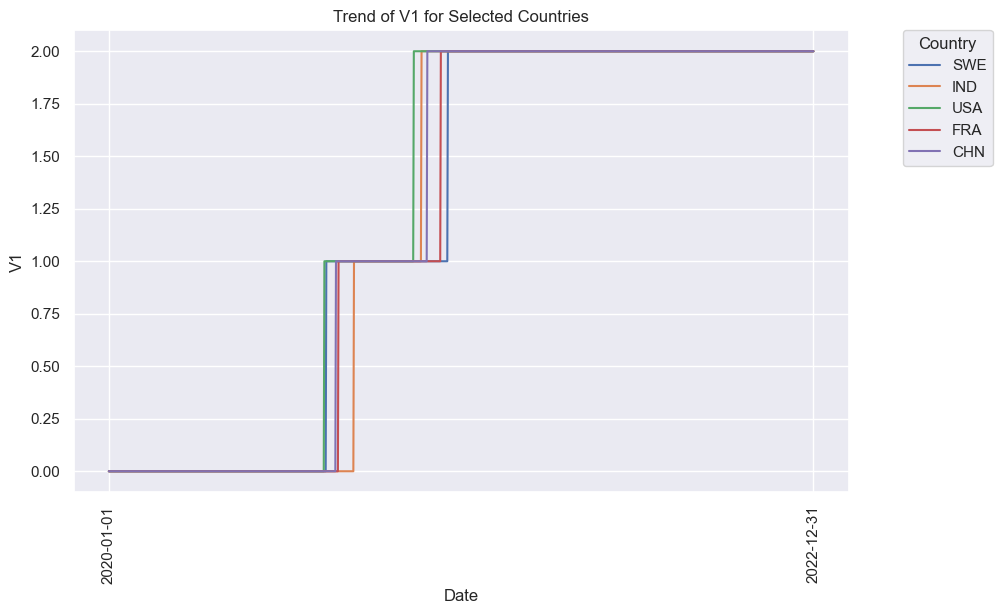

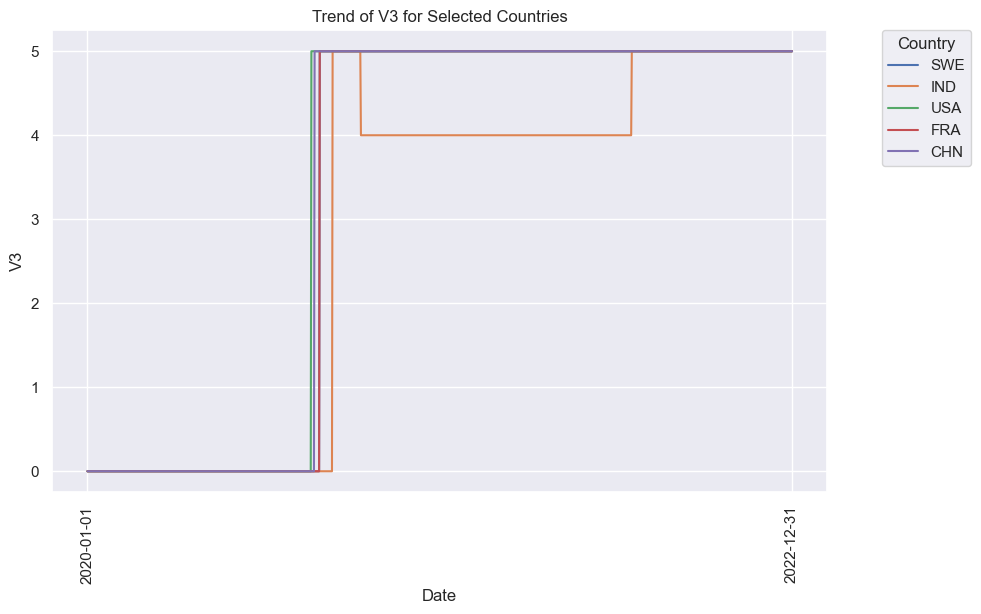

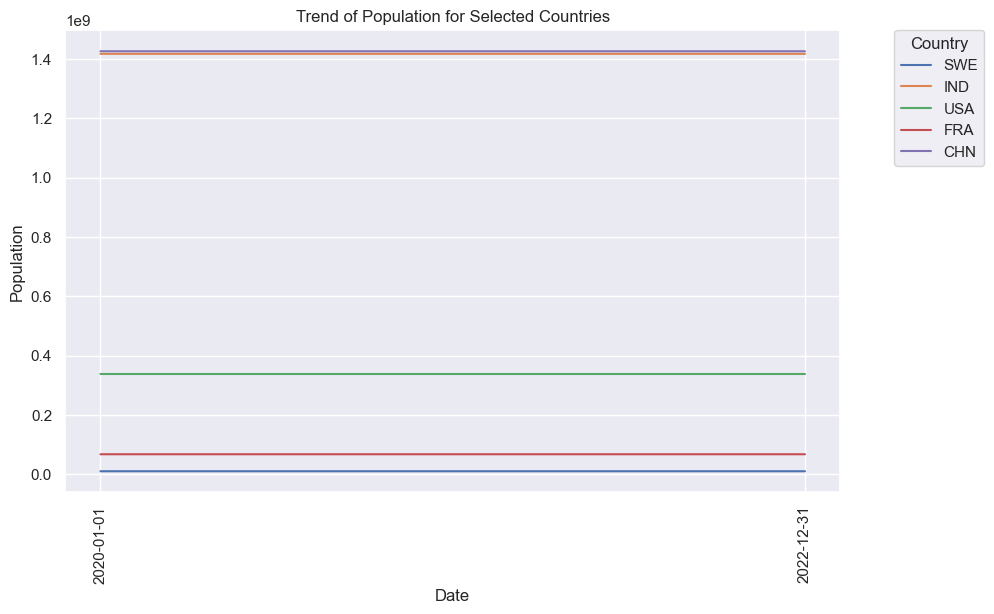

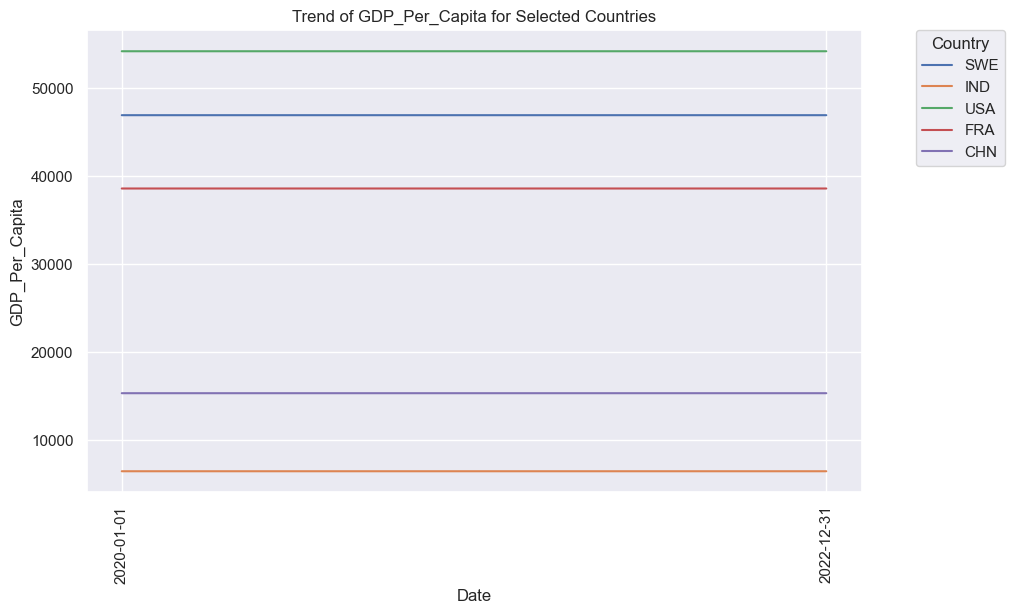

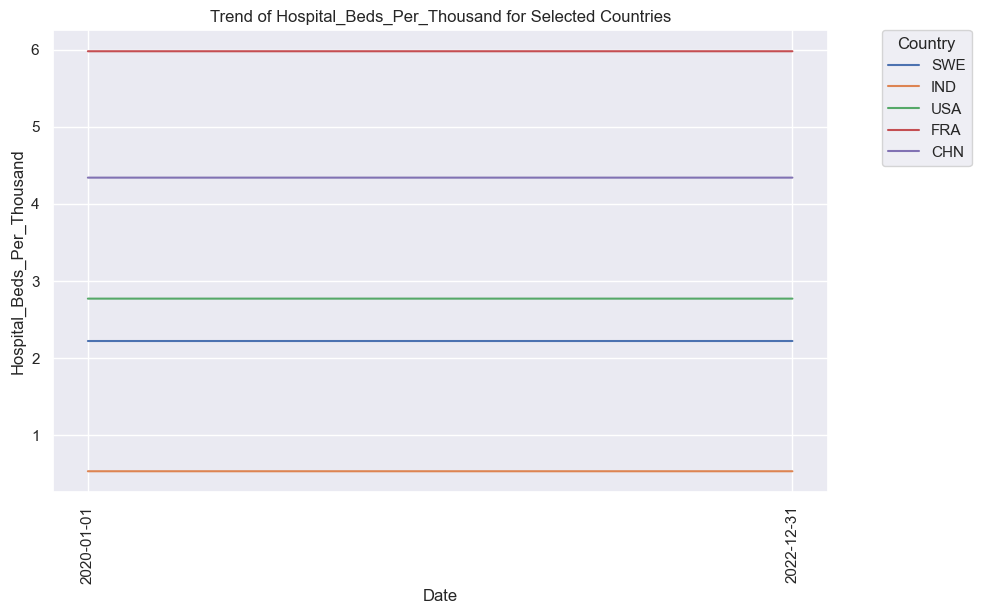

In [111]:
selectedColumns = ['Mortality_Rate_7day_MA', 'ConfirmedCases_7day_MA', 'EconomicSupportIndex','GovernmentResponseIndex_Average', 'H5',
       'V1', 'V3', 'Population', 'GDP_Per_Capita', 'Hospital_Beds_Per_Thousand']

start_date = justViewing['Date'].min()
end_date = justViewing['Date'].max()

for column in selectedColumns:
    plt.figure(figsize=(10, 6)) 
    sns.lineplot(data=justViewing, x='Date', y=column, hue='CountryCode')
    plt.title(f'Trend of {column} for Selected Countries')
    plt.xlabel('Date')
    plt.xticks([start_date, end_date],rotation=90)
    plt.legend(title='Country',loc='upper left', bbox_to_anchor=(1.07, 1), borderaxespad=0.)
    plt.show()

####  Creating New Features

In [112]:
justViewing = justViewing.sort_values(by=['CountryCode', 'Date'])
justViewing['changeInCases'] = justViewing.groupby(['CountryCode'])['ConfirmedCases'].transform(lambda x: x.diff())
justViewing['changeInCasesMA'] = justViewing.groupby(['CountryCode'])['ConfirmedCases_7day_MA'].transform(lambda x: x.diff())
justViewing['changeInMortality'] = justViewing.groupby(['CountryCode'])['Mortality Rate'].transform(lambda x: x.diff())
justViewing['changeInMortalityMA'] = justViewing.groupby(['CountryCode'])['Mortality_Rate_7day_MA'].transform(lambda x: x.diff())
justViewing = justViewing.replace(np.nan, 0)
justViewing.head(1)


,CountryCode,Date,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex,Population,GDP_Per_Capita,Life_Expectancy,Hospital_Beds_Per_Thousand,Mortality Rate,H5,V1,V3,Mortality_Rate_7day_MA,ConfirmedCases_7day_MA,changeInCases,changeInCasesMA,changeInMortality,changeInMortalityMA
126,CHN,2020-01-01,0.0,0.0,NV,0.0,5.99,6.85,0.0,1.425887e+09,15308.712,76.91,4.34,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


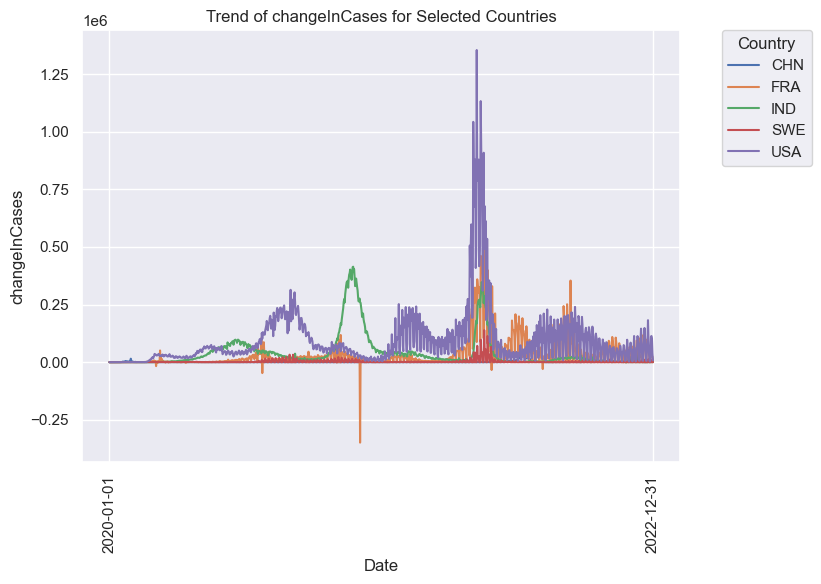

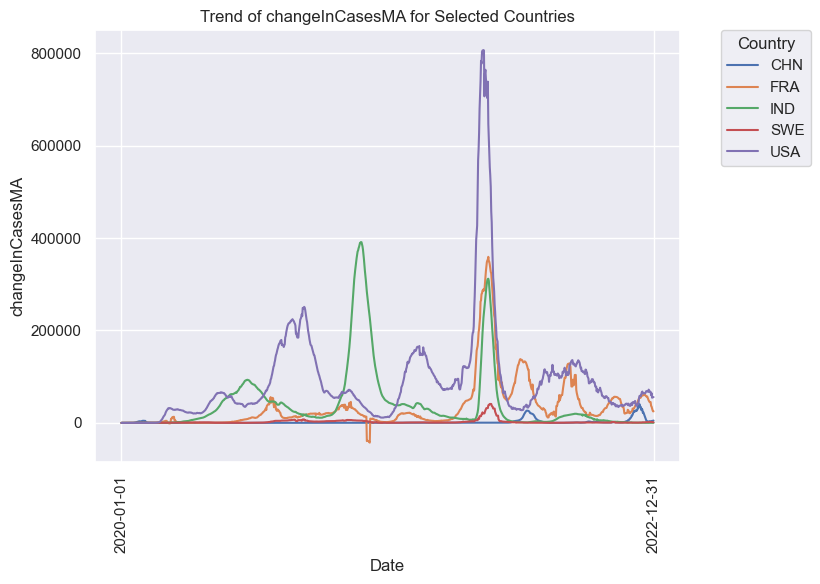

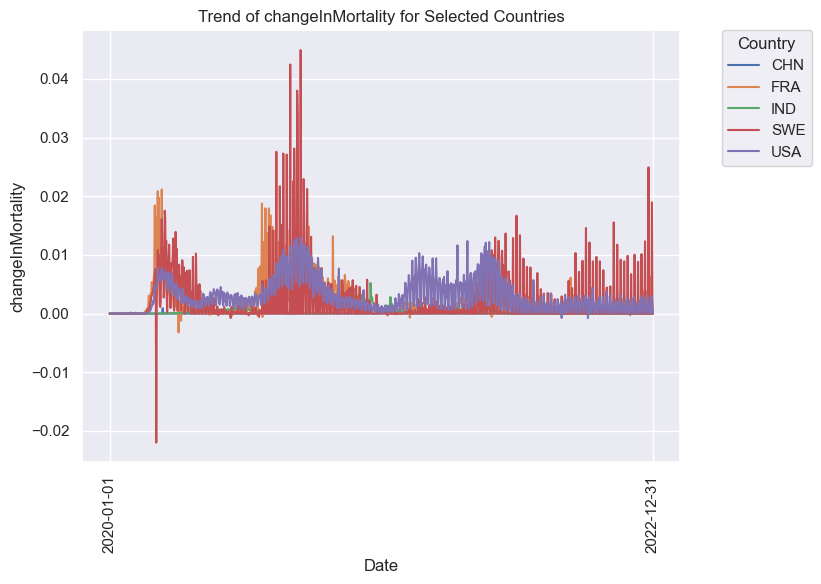

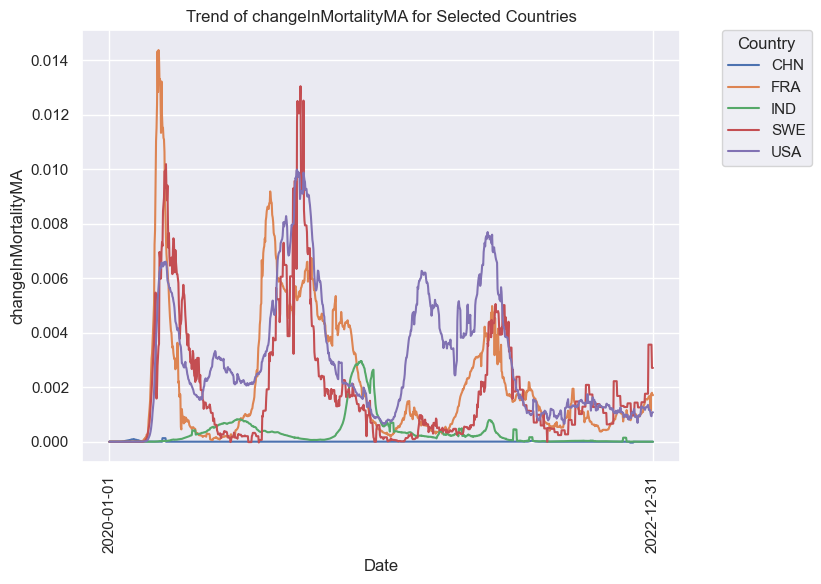

In [113]:
selectedColumns = ['changeInCases', 'changeInCasesMA','changeInMortality','changeInMortalityMA']
start_date = justViewing['Date'].min()
end_date = justViewing['Date'].max()

for column in selectedColumns:
    plt.figure(figsize=(10, 6))  # Set the figure size
    sns.lineplot(data=justViewing, x='Date', y=column, hue='CountryCode')
    plt.title(f'Trend of {column} for Selected Countries')
    plt.xlabel('Date')
    plt.xticks([start_date, end_date],rotation=90)
    plt.legend(title='Country',loc='upper left', bbox_to_anchor=(1.07, 1), borderaxespad=0.)
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()

In [114]:
justViewing[justViewing['CountryCode'] == 'USA']['ConfirmedCases']

98                0.0
270               0.0
319               0.0
468               0.0
742               0.0
             ...     
163728    100501536.0
163858    100614880.0
164096    100718983.0
164116    100757380.0
164349    100765333.0
Name: ConfirmedCases, Length: 1096, dtype: float64

In [115]:
justViewing.head()

,CountryCode,Date,ConfirmedCases,ConfirmedDeaths,MajorityVaccinated,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex,Population,GDP_Per_Capita,Life_Expectancy,Hospital_Beds_Per_Thousand,Mortality Rate,H5,V1,V3,Mortality_Rate_7day_MA,ConfirmedCases_7day_MA,changeInCases,changeInCasesMA,changeInMortality,changeInMortalityMA
126,CHN,2020-01-01,0.0,0.0,NV,0.00,5.99,6.85,0.0,1.425887e+09,15308.712,76.91,4.34,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
261,CHN,2020-01-02,0.0,0.0,NV,0.00,5.99,6.85,0.0,1.425887e+09,15308.712,76.91,4.34,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
300,CHN,2020-01-03,0.0,0.0,NV,0.00,5.99,6.85,0.0,1.425887e+09,15308.712,76.91,4.34,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
450,CHN,2020-01-04,0.0,0.0,NV,0.00,5.99,6.85,0.0,1.425887e+09,15308.712,76.91,4.34,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
732,CHN,2020-01-05,0.0,0.0,NV,2.78,10.68,12.20,0.0,1.425887e+09,15308.712,76.91,4.34,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Daily Change in ConfirmedCases

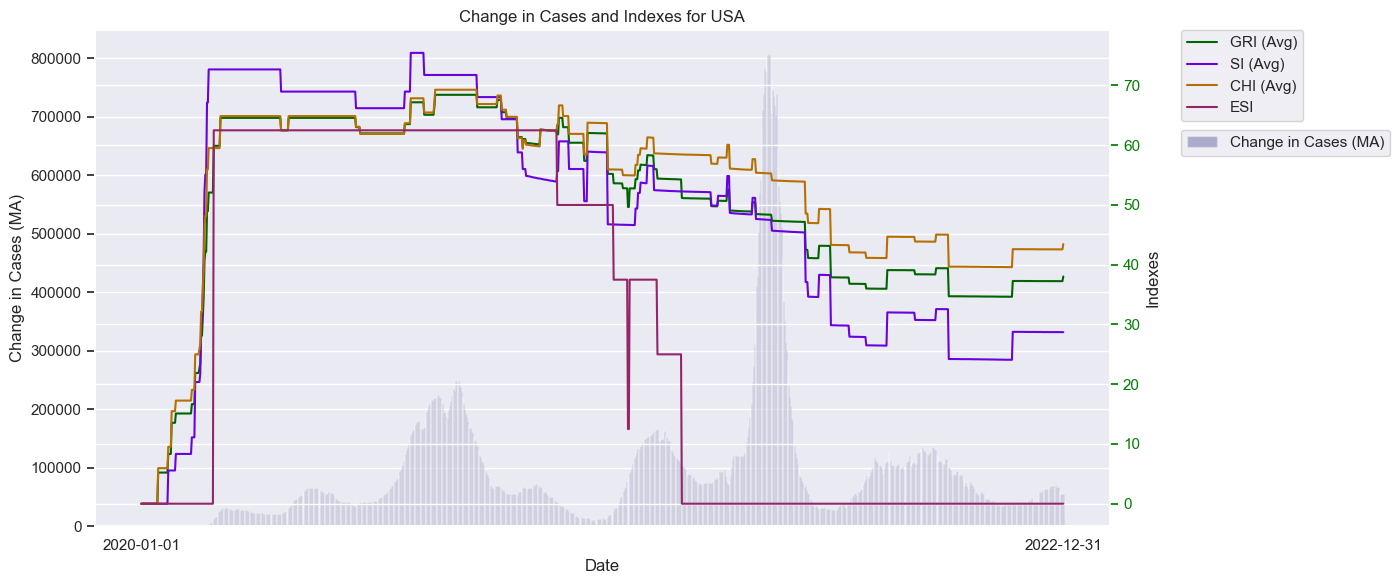

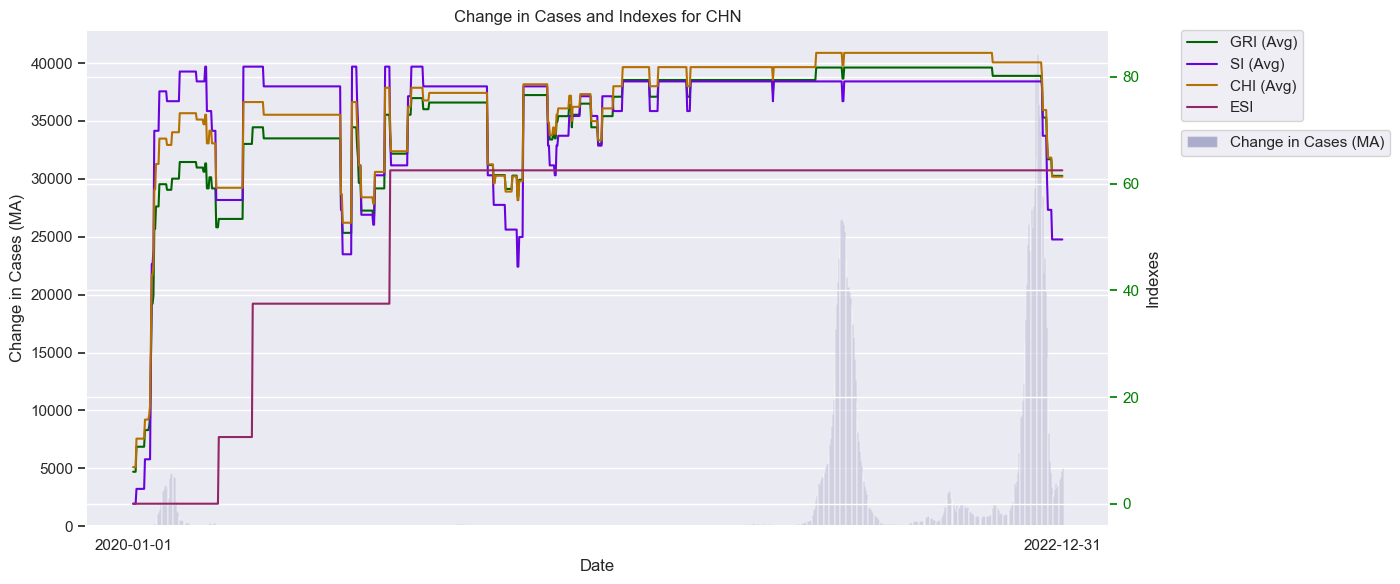

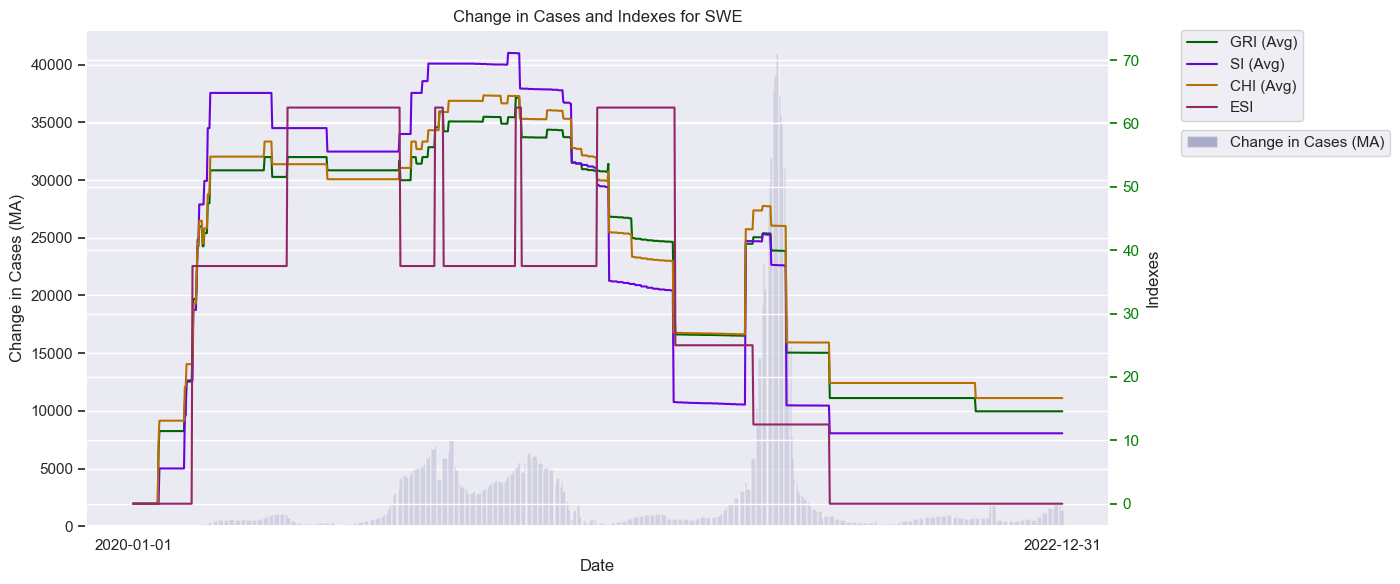

In [116]:
countries = ['USA', 'CHN', 'SWE']

start_date = justViewing['Date'].min()
end_date = justViewing['Date'].max()

for idx, country in enumerate(countries):
    
    plt.figure(figsize=(14, 6))

    data = justViewing[justViewing['CountryCode'] == country].sort_values(by='Date')

    ax1 = sns.barplot(x='Date', y='changeInCasesMA', data=data, color='#040080',zorder=1,alpha=0.3,label='Change in Cases (MA)') 
    ax1.set_ylabel('Change in Cases (MA)')
    ax1.set_title(f'Change in Cases and Indexes for {country}')
    ax1.tick_params(axis='y', colors='#292929')

    ax2 = ax1.twinx()
    sns.lineplot(x='Date', y='GovernmentResponseIndex_Average', data=data, ax=ax2, color='darkgreen', label='GRI (Avg)')
    sns.lineplot(x='Date', y='StringencyIndex_Average', data=data, ax=ax2, color='#6a02e0', label='SI (Avg)')
    sns.lineplot(x='Date', y='ContainmentHealthIndex_Average', data=data, ax=ax2, color='#b57000', label='CHI (Avg)')
    sns.lineplot(x='Date', y='EconomicSupportIndex', data=data, ax=ax2, color='#932667', label='ESI')
    ax2.set_ylabel('Indexes')
    ax2.tick_params(axis='y', colors='green')
   
    ax1.legend(loc='upper left', bbox_to_anchor=(1.07, 0.8), borderaxespad=0.)
    ax2.legend(loc='upper left', bbox_to_anchor=(1.07, 1), borderaxespad=0.)
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    plt.xticks([start_date, end_date])
    plt.tight_layout()
    plt.show()

#### Daily Change in Mortality Rate

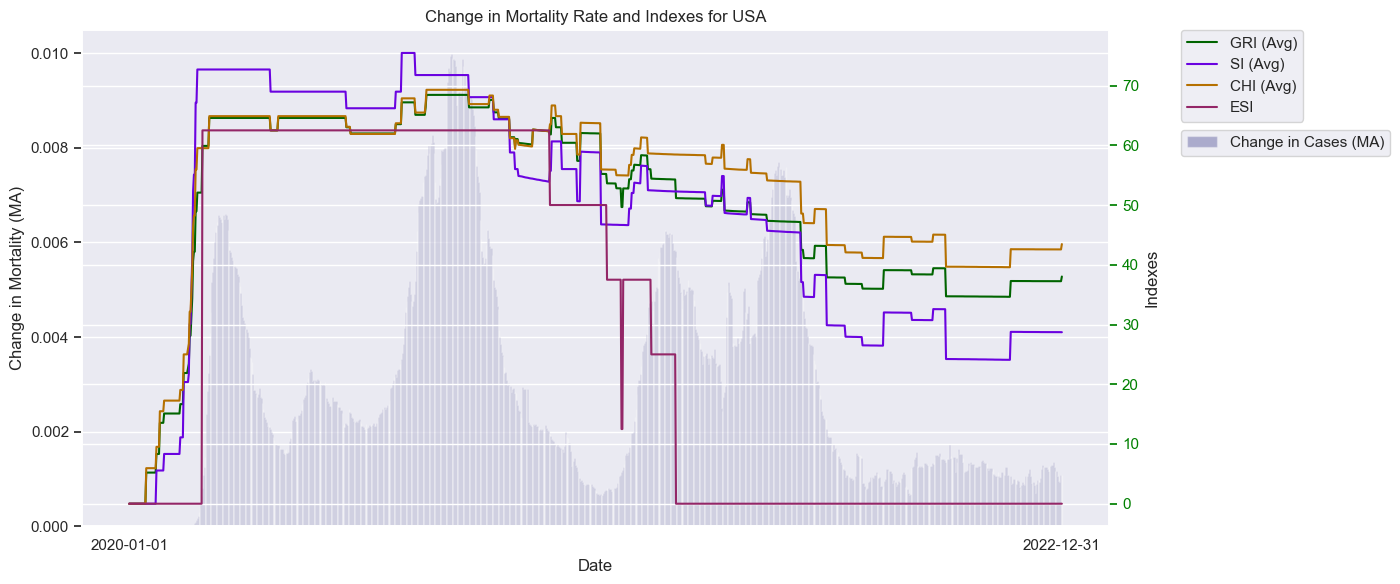

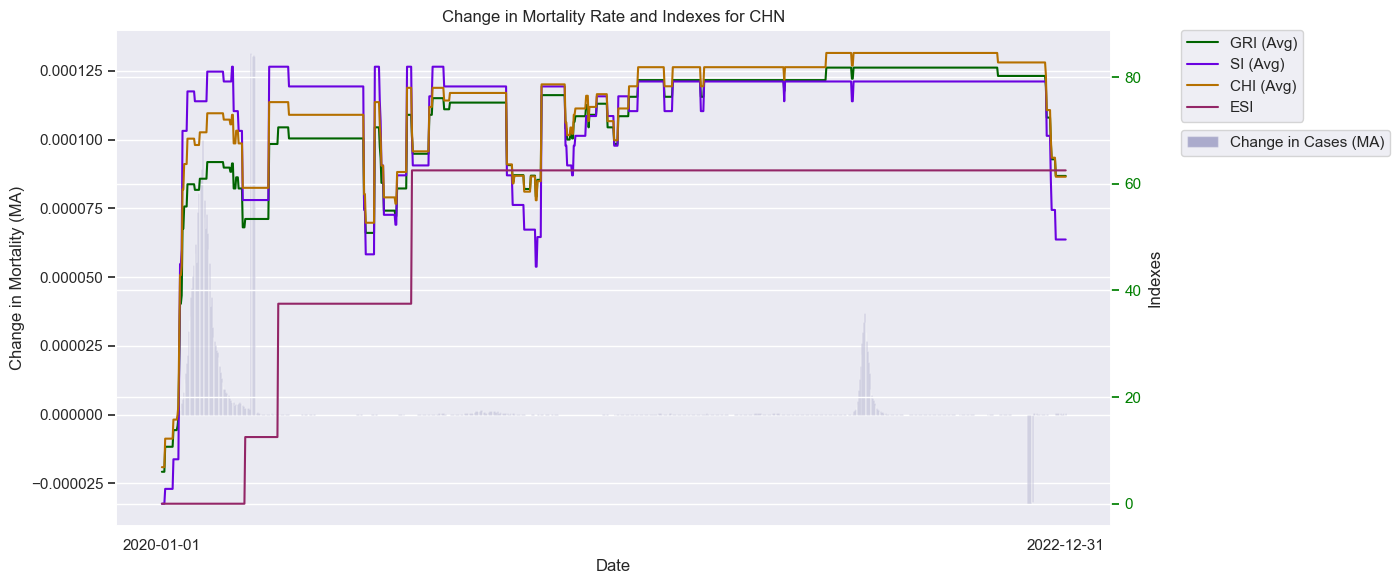

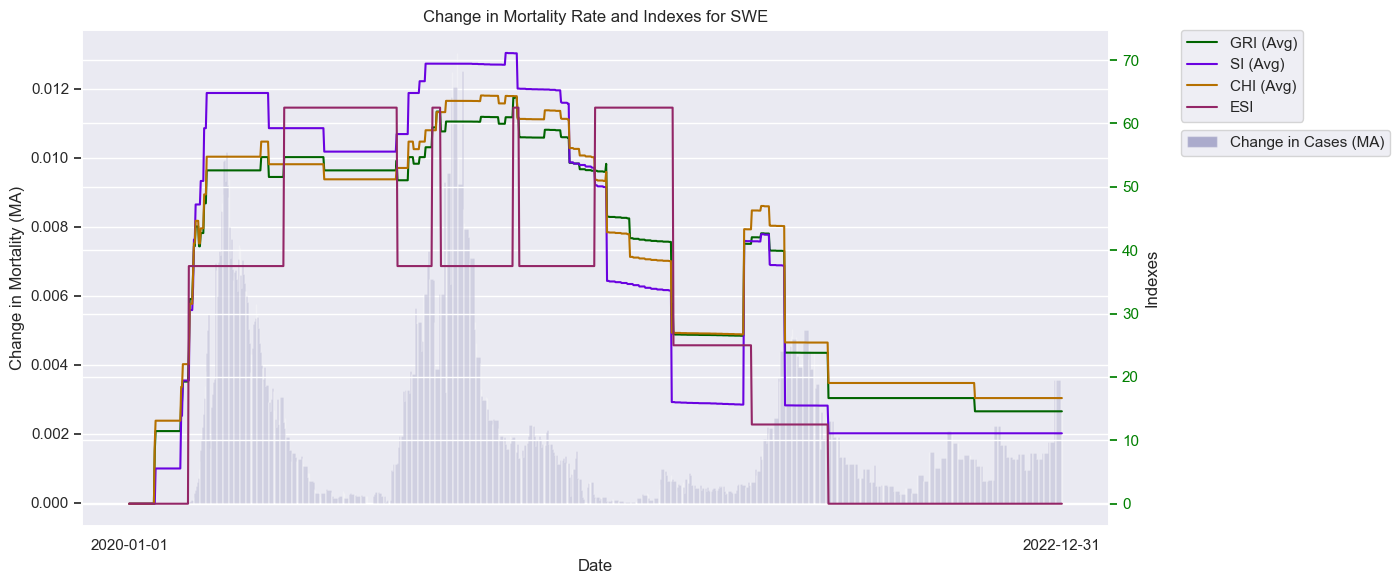

In [119]:
countries = ['USA', 'CHN', 'SWE']

start_date = justViewing['Date'].min()
end_date = justViewing['Date'].max()

for idx, country in enumerate(countries):
    
    plt.figure(figsize=(14, 6))

    data = justViewing[justViewing['CountryCode'] == country].sort_values(by='Date')

    ax1 = sns.barplot(x='Date', y='changeInMortalityMA', data=data, color='#040080',zorder=1,alpha=0.3,label='Change in Cases (MA)') 
    ax1.set_ylabel('Change in Mortality (MA)')
    ax1.set_title(f'Change in Mortality Rate and Indexes for {country}')
    ax1.tick_params(axis='y', colors='#292929')

    ax2 = ax1.twinx()
    sns.lineplot(x='Date', y='GovernmentResponseIndex_Average', data=data, ax=ax2, color='darkgreen', label='GRI (Avg)')
    sns.lineplot(x='Date', y='StringencyIndex_Average', data=data, ax=ax2, color='#6a02e0', label='SI (Avg)')
    sns.lineplot(x='Date', y='ContainmentHealthIndex_Average', data=data, ax=ax2, color='#b57000', label='CHI (Avg)')
    sns.lineplot(x='Date', y='EconomicSupportIndex', data=data, ax=ax2, color='#932667', label='ESI')
    ax2.set_ylabel('Indexes')
    ax2.tick_params(axis='y', colors='green')
   
    ax1.legend(loc='upper left', bbox_to_anchor=(1.07, 0.8), borderaxespad=0.)
    ax2.legend(loc='upper left', bbox_to_anchor=(1.07, 1), borderaxespad=0.)
    plt.tight_layout(rect=[0, 0, 0.85, 1])

    plt.xticks([start_date, end_date])
    plt.tight_layout()
    plt.show()

##### Creating the new features for every country

In [ ]:
df['DailyChangeInCases'] = df.groupby(['CountryCode'])['ConfirmedCases_7day_MA'].transform(lambda x: x.diff())